# 14-day cumulative number of COVID-19 cases per 100 000

At the end of the page, we provide a detailed description of how the numbers are calculated.

### Compute data

In [1]:
import pandas as pd
pd.set_option("display.max_rows", None)
from oscovida import get_incidence_rates_countries

## Table for all countries

In [2]:
cases_incidence, deaths_incidence = get_incidence_rates_countries()

Downloaded data: last data point 2/20/22 from https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv
Downloaded data: last data point 2/20/22 from https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv


In [3]:
cases_incidence

,14-day-sum,population,14-day-incidence-rate
Country,,,
Afghanistan,6014,38928341,15.4
Albania,5540,2877800,192.5
Algeria,6078,43851043,13.9
Andorra,990,77265,1281.3
Angola,274,32866268,0.8
Antarctica,0,0,NaN
Antigua and Barbuda,555,97928,566.7
Argentina,237625,45195777,525.8
Armenia,25507,2963234,860.8


## Table sorted by 14-day-incidence

In [4]:
cases_incidence.sort_values(by=['14-day-incidence-rate'], ascending=False)

,14-day-sum,population,14-day-incidence-rate
Country,,,
Winter Olympics 2022,74,0,inf
Denmark,583587,5837213,9997.7
Iceland,28556,341250,8368.1
Latvia,135839,1886202,7201.7
Netherlands,1192161,17134873,6957.5
Estonia,78801,1326539,5940.3
Georgia,234290,3989175,5873.1
Slovakia,295161,5459643,5406.2
Palau,907,18008,5036.7


## Tutorial: Detailed calculation for one country

In [5]:
from oscovida import fetch_cases, get_population
import datetime

In [6]:
period = 14 # Days we compute the incidence rate over

In [7]:
cases = fetch_cases() # Get a DataFrame where each row is the country, and columns cumulative case numbers
cases = cases.groupby(cases.index).sum() # Merge the rows for different regions as we want the numbers for an entire country

In [8]:
cases_germany = cases.loc['Germany'][2:] # First 2 entries are lat/lon so we only take the subsequent ones
cases_germany.tail()

2/16/22    13093881.0
2/17/22    13309040.0
2/18/22    13491802.0
2/19/22    13605445.0
2/20/22    13667353.0
Name: Germany, dtype: float64

In [9]:
yesterday = datetime.datetime.now() - datetime.timedelta(days=1)
x_days_ago = yesterday - datetime.timedelta(days=period)

In [10]:
period_mask = (
    (yesterday > pd.to_datetime(cases_germany.index)) &
    (pd.to_datetime(cases_germany.index) > x_days_ago)
) # Mask for dates between today and x days ago

In [11]:
cases_in_period_per_day_germany = cases_germany[period_mask].diff() # Apply the period mask and get the diff to get the daily new cases
cases_in_period_per_day_germany

2/7/22          NaN
2/8/22     380632.0
2/9/22     252813.0
2/10/22    236080.0
2/11/22    206242.0
2/12/22    116810.0
2/13/22     62841.0
2/14/22    174539.0
2/15/22     63210.0
2/16/22    401828.0
2/17/22    215159.0
2/18/22    182762.0
2/19/22    113643.0
2/20/22     61908.0
Name: Germany, dtype: float64

<AxesSubplot:>

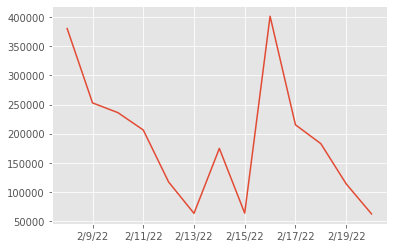

In [12]:
cases_in_period_per_day_germany.plot() # We can easily look at new cases per day

In [13]:
population = get_population().population

In [14]:
population_germany = population.loc['Germany'] # Get the population of Germany
population_germany

83155031.0

In [15]:
incidence_rate_germany = cases_in_period_per_day_germany.sum() / population_germany * 100_000
incidence_rate_germany # By convention this is total cases over period / population * 100_000

2968.5119112035445